In [101]:
%run datasets.ipynb
%run trees_lib.ipynb

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [102]:
dataset = datasets_thurgau_7()
#dataset = datasets_cities_200k()
#dataset = datasets_world_12M()


  0%|          | 0/6 [00:00<?, ?it/s]

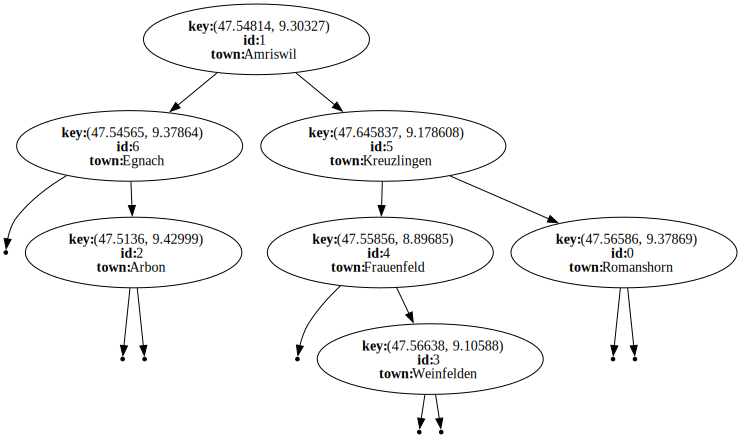

In [120]:
import random
shuffled = list(key_id_tuples(dataset, ['latitude', 'longitude']))
random.shuffle(shuffled)
kdtree = build_kd_tree(shuffled, len(dataset))
tree_height(kdtree)
tree_graph(kdtree, dataset, str(tree_height(kdtree)))

In [121]:
%%time
# All towns in Oberthurgau
lower_left = (47.5, 9.2)
upper_right = (47.6, 9.5)
print("Towns in Oberthurgau:")
for node in search_kd_tree(kdtree, [(lower_left[0], upper_right[0]), (lower_left[1], upper_right[1])]):
    print(node.key, node.value, dataset[node.value]['name'])



Towns in Oberthurgau:
(47.54565, 9.37864) 6 Egnach
(47.5136, 9.42999) 2 Arbon
(47.54814, 9.30327) 1 Amriswil
(47.56586, 9.37869) 0 Romanshorn
CPU times: user 64 µs, sys: 81 µs, total: 145 µs
Wall time: 143 µs
